# 4.1. Hamiltonian mappings

Maximum Pauli weight, depending on qubit count (number of fermionic modes, i.e.
molecule complexity):

- Jordan-Wigner mapping, yielding a certain qubit Hamiltonian,
- Bravyi-Kitaev mapping, yielding a certain qubit Hamiltonian,
- Parity mapping with qubit reduction for number of particles, yielding a certain qubit Hamiltonian.

In [54]:
from lib.hamiltonian_builder import hamiltonian_for_molecule_and_mapper
from matplotlib import pyplot as plt
import time
import numpy as np

In [55]:
molecules = [
    ("H2", "H .0 .0 .0; H .0 .0 0.735", 4),
    # ("HeH+", "He .0 .0 .0; H .0 .0 0.75", 4),
    ("LiH", "Li .0 .0 .0; H .0 .0 1.6", 12),
    ("HF", "H .0 .0 .0; F .0 .0 0.917", 12),
    ("BeH2", "Be .0 .0 .0; H .0 .0 1.3; H .0 .0 -1.3", 14),
    ("H2O", "O .0 .0 .0; H .0 .0 0.96; H .0 .76 0.48", 14),
    ("CH4", "C .0 .0 .0; H .63 .63 .63; H -.63 -.63 .63; H -.63 .63 -.63; H .63 -.63 -.63", 18),
    ("NH3", "N .0 .0 .0; H .0 .94 .0; H .0 -.47 .81; H .0 -.47 -.81", 20),
    ("CO", "C .0 .0 .0; O .0 .0 1.128", 20),
    ("N2", "N .0 .0 .0; N .0 .0 1.0977", 20),
    ("F2", "F .0 .0 .0; F .0 .0 1.4119", 20),
    ("CH3OH", "C .0 .0 .0; O .0 .0 1.43; H .0 0.94 -.63; H .0 -.94 -.63; H .94 .0 .63; H -.94 .0 .63", 24),
    ("C2H4", "C .0 .0 .0; C .0 .0 1.34; H .0 .94 -0.6; H .0 -.94 -0.6; H .0 .94 1.94; H .0 -.94 1.94", 28),
    ("C2H6", "C .0 .0 .0; C .0 .0 1.54; H .94 .0 .0; H -.94 .0 .0; H .0 .94 .0; H .0 -.94 .0; H .0 .0 .94; H .0 .0 -0.94", 28),
    ("C2H2", "C .0 .0 .0; C .0 .0 1.20; H .0 .0 -1.1; H .0 .0 2.3", 28),
]

mappers = ["JW", "BK", "Parity"]

> List of molecules generated with ChatgGPT. More information in [this file](./molecule-list-source.md)

In [56]:
# Parity
max_pauli_weights=[]
runtimes=[]

for molecule in molecules:
    start = time.time()
    hamiltonian = hamiltonian_for_molecule_and_mapper(molecule[1], mappers[2])
    end = time.time()
    runtimes.append(end - start)
    max_weight = max(p.count('X') + p.count('Y') + p.count('Z') for p in hamiltonian.paulis.to_labels())
    max_pauli_weights.append(max_weight)
    print(f"{molecule[0]}: {max_weight}")
print(max_pauli_weights)
print(runtimes)


H2: 2
LiH: 10
HF: 10
BeH2: 12
H2O: 12
CH4: 16
NH3: 14
CO: 18
N2: 18
F2: 18
CH3OH: 26
C2H4: 26
C2H6: 30
C2H2: 22
[2, 10, 10, 12, 12, 16, 14, 18, 18, 18, 26, 26, 30, 22]
[0.11347293853759766, 0.9342532157897949, 0.9316420555114746, 1.03145432472229, 3.1117284297943115, 10.058337926864624, 2.8203928470611572, 8.191211223602295, 4.094875335693359, 4.210124254226685, 23.396917581558228, 12.91723108291626, 61.31500959396362, 9.032000303268433]


In [57]:
# JW
jw_max_pauli_weights=[]
jw_runtimes=[]

for molecule in molecules:
    start = time.time()
    hamiltonian = hamiltonian_for_molecule_and_mapper(molecule[1], mappers[0])
    end = time.time()
    jw_runtimes.append(end - start)
    max_weight = max(p.count('X') + p.count('Y') + p.count('Z') for p in hamiltonian.paulis.to_labels())
    jw_max_pauli_weights.append(max_weight)
    print(f"{molecule[0]}: {max_weight}")
print(jw_max_pauli_weights)
print(jw_runtimes)

H2: 4
LiH: 12
HF: 12
BeH2: 14
H2O: 14
CH4: 18
NH3: 16
CO: 20
N2: 20
F2: 20
CH3OH: 28
C2H4: 28
C2H6: 32
C2H2: 24
[4, 12, 12, 14, 14, 18, 16, 20, 20, 20, 28, 28, 32, 24]
[0.06256580352783203, 1.0249285697937012, 0.9315841197967529, 1.0243396759033203, 3.0902059078216553, 9.968528747558594, 2.8109290599823, 7.785173177719116, 4.026407957077026, 3.9972026348114014, 22.554049015045166, 12.871454954147339, 48.71720361709595, 8.623907566070557]


In [58]:
# BK
bk_max_pauli_weights=[]
bk_runtimes=[]

for molecule in molecules:
    start = time.time()
    hamiltonian = hamiltonian_for_molecule_and_mapper(molecule[1], mappers[2])
    end = time.time()
    bk_runtimes.append(end - start)
    max_weight = max(p.count('X') + p.count('Y') + p.count('Z') for p in hamiltonian.paulis.to_labels())
    bk_max_pauli_weights.append(max_weight)
    print(f"{molecule[0]}: {max_weight}")
print(bk_max_pauli_weights)
print(bk_runtimes)

H2: 2
LiH: 10
HF: 10
BeH2: 12
H2O: 12
CH4: 16
NH3: 14
CO: 18
N2: 18
F2: 18
CH3OH: 26
C2H4: 26
C2H6: 30
C2H2: 22
[2, 10, 10, 12, 12, 16, 14, 18, 18, 18, 26, 26, 30, 22]
[0.08075976371765137, 1.0122029781341553, 0.9677155017852783, 1.000556230545044, 3.0539867877960205, 10.36757779121399, 2.8536503314971924, 8.40406084060669, 4.189828395843506, 4.15387749671936, 23.399381160736084, 12.812066078186035, 50.72716999053955, 9.15545129776001]


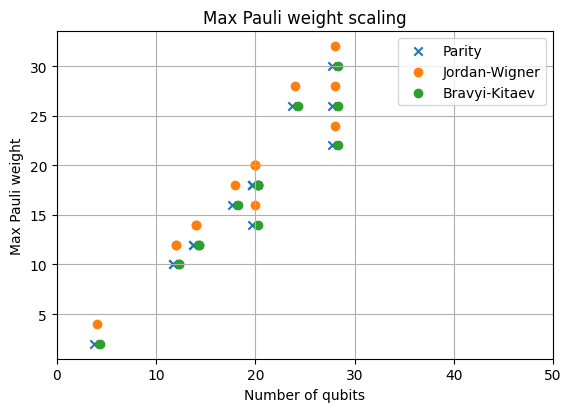

In [75]:
x = np.array([m[2] for m in molecules])
jitter = 0.3

plt.scatter(x - jitter, max_pauli_weights, label="Parity", marker='x')
plt.scatter(x, jw_max_pauli_weights, label="Jordan-Wigner")
plt.scatter(x + jitter, bk_max_pauli_weights, label="Bravyi-Kitaev")

plt.legend()
plt.xlabel("Number of qubits")
plt.xlim(0, 50)
plt.gca().set_aspect('equal', adjustable='box')
plt.ylabel("Max Pauli weight")
plt.title("Max Pauli weight scaling")
plt.grid(True)
plt.show()

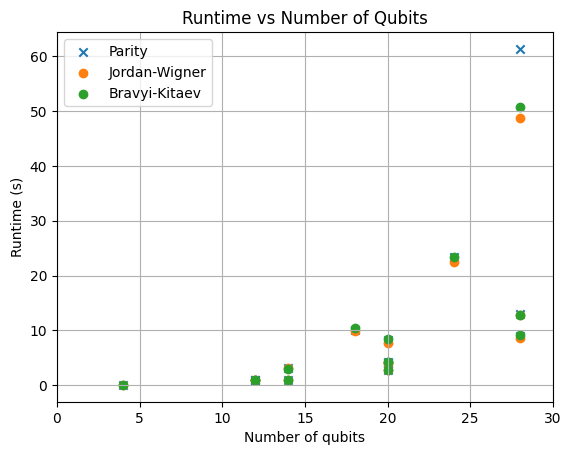

In [76]:
plt.scatter([m[2] for m in molecules], runtimes, label="Parity", marker='x')
plt.scatter([m[2] for m in molecules], jw_runtimes, label="Jordan-Wigner")
plt.scatter([m[2] for m in molecules], bk_runtimes, label="Bravyi-Kitaev")
plt.legend()
plt.xlabel("Number of qubits")
plt.xlim(0, 30)
plt.ylabel("Runtime (s)")
plt.title("Runtime vs Number of Qubits")
plt.grid(True)
plt.show()